<a href="https://colab.research.google.com/github/Veera9014/practice-data-science-code/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC

In [ ]:

data=pd.read_csv('pima-indians-diabetes.csv')

In [ ]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
x=data.iloc[:,:8]
y=data.iloc[:,8]

In [ ]:
x.head()

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [ ]:
y.head()

,1
0,0
1,1
2,0
3,1
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((613, 8), (154, 8), (613,), (154,))

# build the model


In [ ]:
model=SVC(C=10,gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       210

    accuracy                           1.00       613
   macro avg       1.00      1.00      1.00       613
weighted avg       1.00      1.00      1.00       613



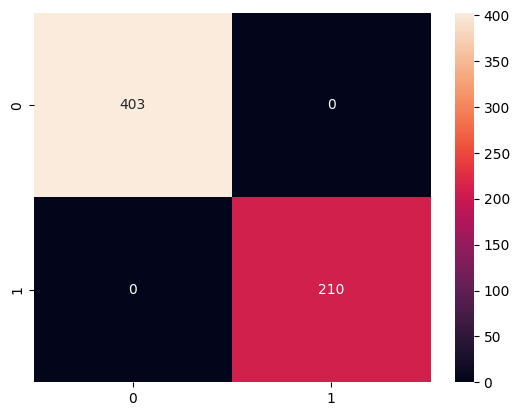

In [ ]:
yhat_train=model.predict(x_train)
cm=confusion_matrix(y_train,yhat_train)
print(classification_report(y_train,yhat_train))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.90      0.76        97
           1       0.57      0.23      0.33        57

    accuracy                           0.65       154
   macro avg       0.61      0.56      0.54       154
weighted avg       0.63      0.65      0.60       154



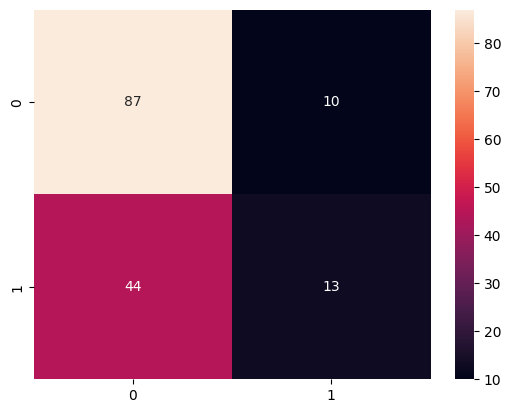

In [ ]:
yhat_test=model.predict(x_test)
cm=confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
model=SVC()

In [ ]:
parameters={
    'C':[0.5,0.6,1.0,1.1,1.5],
    'gamma':[0.1,0.01,1]
}

In [ ]:
cv=GridSearchCV(model,param_grid=parameters,cv=5)

In [ ]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 1.0, 1.1, 1.5],
                         'gamma': [0.1, 0.01, 1]})

In [ ]:
cv.best_params_

{'C': 1.5, 'gamma': 0.01}

### visualize the data

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tmodel=TSNE(n_components=2)
tdata=tmodel.fit_transform(x)
tdata

array([[-14.002161,   7.874058],
       [-39.60262 ,  18.401983],
       [ 14.013186, -15.891184],
       ...,
       [ 20.031313,  -8.243288],
       [-33.54776 ,   6.549677],
       [-15.250941,   9.193621]], dtype=float32)

In [ ]:
tdf=pd.DataFrame(data=tdata,columns=['c1','c2'])
tdf['class']=data['6']
tdf

,c1,c2,class
0,-14.002161,7.874058,1
1,-39.602619,18.401983,8
2,14.013186,-15.891184,1
3,32.159187,-4.667653,0
4,-31.646681,-1.413551,5
...,...,...,...
762,37.738674,-1.561545,10
763,-21.213636,14.360126,2
764,20.031313,-8.243288,5
765,-33.547760,6.549677,1
